In [1]:
import pandas as pd
import numpy as np  

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('elles_parlent_dataset.csv')

In [2]:
# Use the drop method to remove the 'Jeune' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Define a dictionary to map old column names to new column names
column_mapping = {
    'Unnamed: 1': 'Email',
    'Unnamed: 2': 'Nom',
    'Unnamed: 3': 'Age',
    'Unnamed: 4': 'Ville',
    'Unnamed: 5': 'Telephone',
    'Unnamed: 6': 'Niveau_Etude',
    'Unnamed: 7': 'Autres_Etude',
    'Unnamed: 8': 'Profession',
    'Unnamed: 9': 'Presentation_Personnelle',
    'Unnamed: 10': 'Presentation_Projet',
    'Unnamed: 11': 'Ambition',
    'Unnamed: 12': 'Plus_Belle_Reussite',
    'Unnamed: 13': 'Qualites',
    'Unnamed: 14': 'Faiblesses',
    'Unnamed: 15': 'Interet',
    'Unnamed: 16': 'Information_Concours',
    'Unnamed: 17': 'Autres',
    'Unnamed: 18': 'Participation_Concours',
    'Unnamed: 19': 'Autre_Concours',
    'Unnamed: 20': 'Langue',
    
}

# Use the rename method to rename columns
df.rename(columns=column_mapping, inplace=True)


# Use the drop method to remove the 'Jeune' column
df.drop(columns=['Jeune'], inplace=True)

# Use the drop method to remove the first row
df.drop(index=0, inplace=True)

# Convert 'Age' column to integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')

# Drop rows with NaN values in the 'Age' column
df = df.dropna(subset=['Age'])

# Convert 'Telephone' column to integer
df['Telephone'] = pd.to_numeric(df['Telephone'], errors='coerce').astype('Int64')
print(df['Age'])

# Define a function to categorize age
def categorize_age(age):
    if age < 21:
        return 'Minime'
    elif 21 <= age <= 25:
        return 'Jeune'
    else:
        return 'Senior'

# Apply the function to create the 'Categorie' column
df['Categorie'] = df['Age'].apply(categorize_age)
print(df['Categorie'])

1     23
2     25
3     33
4     23
5     34
      ..
60    27
61    28
62    22
63    20
64    27
Name: Age, Length: 64, dtype: Int64
1      Jeune
2      Jeune
3     Senior
4      Jeune
5     Senior
       ...  
60    Senior
61    Senior
62     Jeune
63    Minime
64    Senior
Name: Categorie, Length: 64, dtype: object


In [3]:
# Display the counts of each category in the 'Categorie' column
categorie_counts = df['Categorie'].value_counts()

# Display the statistics
print("Statistics for the 'Categorie' column:")
print(categorie_counts)


Statistics for the 'Categorie' column:
Categorie
Jeune     29
Senior    22
Minime    13
Name: count, dtype: int64


In [4]:
# Display the counts of each category in the 'Categorie' column
ville_counts = df['Ville'].value_counts()

# Display the statistics
print("Statistics for the 'Ville' column:")
print(ville_counts)


Statistics for the 'Ville' column:
Ville
Yaounde    46
Douala     18
Name: count, dtype: int64


In [5]:
# Display the counts of each unique combination of 'Ville' and 'Categorie'
combined_stats = df.groupby(['Ville', 'Categorie']).size().reset_index(name='Counts')

# Display the statistics
print("Statistics for the combination of 'Ville' and 'Categorie':")
print(combined_stats)

Statistics for the combination of 'Ville' and 'Categorie':
     Ville Categorie  Counts
0   Douala     Jeune       8
1   Douala    Minime       2
2   Douala    Senior       8
3  Yaounde     Jeune      21
4  Yaounde    Minime      11
5  Yaounde    Senior      14


c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

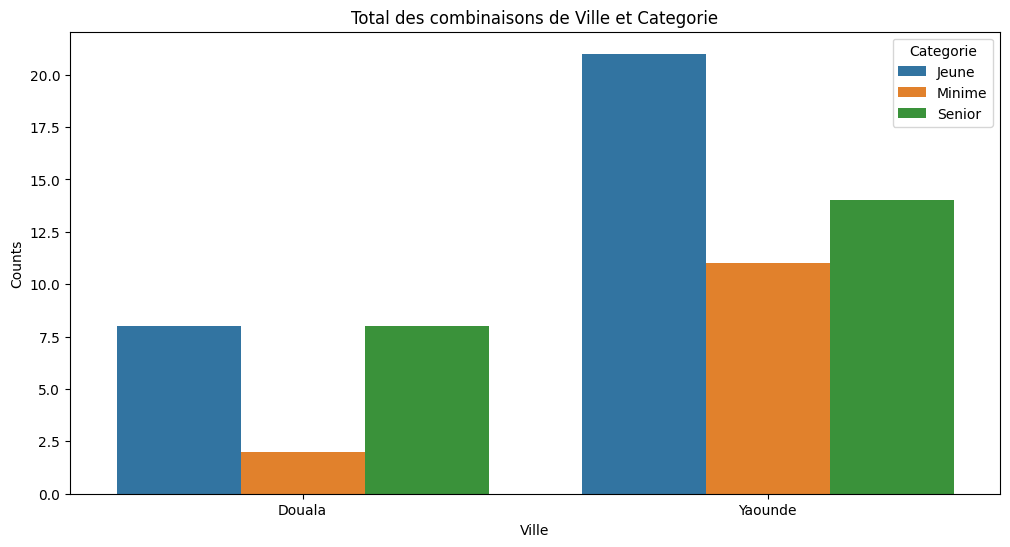

In [6]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Ville', y='Counts', hue='Categorie', data=combined_stats)
plt.title('Total des combinaisons de Ville et Categorie')
plt.show()

In [9]:
# Set maximum number of displayed rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.display import display
# Display the counts of each unique combination of 'Nom', 'Ville', and 'Categorie'
combined_stats = df.groupby(['Nom', 'Ville', 'Categorie']).size().reset_index(name='Counts')

# Display the statistics
print("Statistics for the combination of 'Nom', 'Ville' and 'Categorie':")
display(combined_stats)

Statistics for the combination of 'Nom', 'Ville' and 'Categorie':


,Nom,Ville,Categorie,Counts
0,ABILA ESSONO Annelle Fabienne,Douala,Jeune,1
1,ABOMO Christelle Léticia,Yaounde,Jeune,1
2,AGBORT FRIEDA BALEP,Douala,Jeune,1
3,ASSENA ESIENE VALERIE MARTHE,Douala,Senior,1
4,Asongafack Marie Therese,Yaounde,Senior,1
5,BABEI Christiane,Douala,Minime,1
6,BEGNON DE BONDOL Joyce Audrey,Yaounde,Jeune,1
7,BEKEMEN ashline malka,Yaounde,Minime,1
8,BOUGUEM WAKAM Priscile Émilie,Yaounde,Jeune,1
9,Badiang Enefeck Mariama,Yaounde,Jeune,1


In [10]:
# Group by 'Ville' and 'Categorie', then aggregate 'Nom' values into a list
nom_by_ville_categorie = df.groupby(['Ville', 'Categorie'])['Nom'].agg(list).reset_index()

# Display the result
display(nom_by_ville_categorie)

,Ville,Categorie,Nom
0,Douala,Jeune,"[ABILA ESSONO Annelle Fabienne, AGBORT FRIEDA ..."
1,Douala,Minime,"[Dooh laisline agrielle yvanna, BABEI Christiane]"
2,Douala,Senior,"[Charlotte Achoundong, ASSENA ESIENE VALERIE M..."
3,Yaounde,Jeune,"[ABOMO Christelle Léticia, Badiang Enefeck Mar..."
4,Yaounde,Minime,"[BEKEMEN ashline malka, Benga Maryse Farida, G..."
5,Yaounde,Senior,"[DIEPMO NDJOUME ANICE LAURILE, DJILO PEYO ANIE..."


In [11]:
# Jeune Douala
# Specify the target 'Ville' and 'Categorie'
target_ville = 'Douala'
target_categorie = 'Jeune'

# Filter the DataFrame based on the conditions
filtered_df = df[(df['Ville'] == target_ville) & (df['Categorie'] == target_categorie)]

# Extract the 'Nom' values as a list
nom_list = filtered_df['Nom']

nom_list


1      ABILA ESSONO Annelle Fabienne
4                AGBORT FRIEDA BALEP
7                Balde binta Eugénie
19         EYEBE ESSONO BELA MANUELA
33         Moumi Ngamale Virginie E.
41                     Njomkam stela
45          Silatchom Diatanh Hilary
48    Tchidjo Tchidjo Eltsine Cabrel
Name: Nom, dtype: object

In [12]:
# Jeune Douala
# Specify the target 'Ville' and 'Categorie'
target_ville = 'Douala'
target_categorie = 'Minime'

# Filter the DataFrame based on the conditions
filtered_df = df[(df['Ville'] == target_ville) & (df['Categorie'] == target_categorie)]

# Extract the 'Nom' values as a list
nom_list = filtered_df['Nom']

nom_list

17    Dooh laisline agrielle yvanna
57                 BABEI Christiane
Name: Nom, dtype: object

In [13]:
# Jeune Douala
# Specify the target 'Ville' and 'Categorie'
target_ville = 'Douala'
target_categorie = 'Senior'

# Filter the DataFrame based on the conditions
filtered_df = df[(df['Ville'] == target_ville) & (df['Categorie'] == target_categorie)]

# Extract the 'Nom' values as a list
nom_list = filtered_df['Nom']

nom_list

3               Charlotte Achoundong
5       ASSENA ESIENE VALERIE MARTHE
13    DJEUMOU MEKEU PRINCESSE JUDITH
29           Mbouyep doly Christelle
31            Metchum Tayou Loveline
36         Ngo Bassop Gaelle Blanche
42                      Rhodia Priso
49      YEMDJO SIEWE Cyprienne Laure
Name: Nom, dtype: object

In [15]:
# Jeune Douala
# Specify the target 'Ville' and 'Categorie'
target_ville = 'Yaounde'
target_categorie = 'Jeune'

# Filter the DataFrame based on the conditions
filtered_df = df[(df['Ville'] == target_ville) & (df['Categorie'] == target_categorie)]

# Extract the 'Nom' values as a list
nom_list = filtered_df['Nom']

nom_list

2              ABOMO Christelle Léticia
6               Badiang Enefeck Mariama
8         BEGNON DE BONDOL Joyce Audrey
11        BOUGUEM WAKAM Priscile Émilie
21                      GLORIA KAMGAING
23         Ikessi engolo Danielle élise
24         Lehdufe Ethel-burga kerinyuy
30        Mentouga cloé sosthanie joyce
32                    Mezou Gaël Alvine
37                   NGONO JAËL SOUNITA
38                NGOUNE TSANE Francine
40                Njambia Sandra Pamela
43               Sainkam charité madibe
44                          Sandra Obon
46                         Songue Chloé
47             TCHAKOUNTE Yvana Melvine
51                      Petiho Béatrice
52    TCHOUANTCHEU KAMGA serges-vianney
55                    Che Theresia Nnam
56               KAFKA Marie Bernadette
62            MEDIAKE POKAM LOANA CHLOE
Name: Nom, dtype: object

In [16]:
# Jeune Douala
# Specify the target 'Ville' and 'Categorie'
target_ville = 'Yaounde'
target_categorie = 'Minime'

# Filter the DataFrame based on the conditions
filtered_df = df[(df['Ville'] == target_ville) & (df['Categorie'] == target_categorie)]

# Extract the 'Nom' values as a list
nom_list = filtered_df['Nom']

nom_list

9                 BEKEMEN ashline malka
10                  Benga Maryse Farida
20       GHANE NGOUNGOURE Nimatou Nawal
22                HITOT KOME EMMANUELLE
25                        Livanne KANGA
26                        Mahot Suzanne
34    Nang Nyambouri Marguerite Melissa
35             NDJOUN CHEPING Elsa Rose
53                   Che Daina VERSHEYE
59                         Kella Megane
63            ENGOLI EBIE Marie Beniroc
Name: Nom, dtype: object

In [17]:
# Jeune Douala
# Specify the target 'Ville' and 'Categorie'
target_ville = 'Yaounde'
target_categorie = 'Senior'

# Filter the DataFrame based on the conditions
filtered_df = df[(df['Ville'] == target_ville) & (df['Categorie'] == target_categorie)]

# Extract the 'Nom' values as a list
nom_list = filtered_df['Nom']

nom_list

12    DIEPMO NDJOUME ANICE LAURILE
14                 DJILO PEYO ANIE
15              DJOU LONTSI Berole
16         Domkam Tonou Christelle
18     Ewoudou epse Mpah Marceline
27      MBO ELLA ROSELINE LAURELLE
28                      MBONO Vera
39       Nguidjoi Yolande Sandrine
50               GAYA MBOUBA Marie
54        Asongafack Marie Therese
58             RENGOU MEFIRE AÏCHA
60      MBOKWE NJONOU LEA FRANCINE
61                  Kpouyie bintou
64               Zara Fadoul Saleh
Name: Nom, dtype: object

In [18]:
# Display the counts of each category in the 'Categorie' column
ville_counts = df['Ville'].value_counts()

# Display the statistics
print("Statistics for the 'Ville' column:")
print(ville_counts)

Statistics for the 'Ville' column:
Ville
Yaounde    46
Douala     18
Name: count, dtype: int64


In [20]:
# Apply the function to create the 'Categorie' column
df['Categorie'] = df['Age'].apply(categorize_age)


# Display the counts of each category in the 'Categorie' column
categorie_counts = df['Categorie'].value_counts()

# Display the statistics
print("Statistics for the 'Categorie' column:")
print(categorie_counts)

Statistics for the 'Categorie' column:
Categorie
Jeune     29
Senior    22
Minime    13
Name: count, dtype: int64


In [21]:



# Display the counts of each category in the 'Categorie' column
langue_counts = df['Langue'].value_counts()

# Display the statistics
print("Statistics for the 'Categorie' column:")
print(langue_counts)

Statistics for the 'Categorie' column:
Langue
Français    54
Anglais     10
Name: count, dtype: int64


In [22]:
age_statistics = df['Age'].describe()
print(age_statistics)

count        64.0
mean     25.28125
std      6.090505
min          16.0
25%          21.0
50%          23.5
75%         28.25
max          47.0
Name: Age, dtype: Float64


In [23]:
qualities_counts = df['Qualites'].value_counts()
weaknesses_counts = df['Faiblesses'].value_counts()

print("Top Qualities:")
print(qualities_counts.head())

print("\nTop Weaknesses:")
print(weaknesses_counts.head())

Top Qualities:
Qualites
Je suis polie, ouverte d'esprit. Je connais mes limites, et respecte les limites des autres. Je respecte et\r\nprends en compte le ressenti des autres à mon sujet. Je suis détachée.    1
Pieuse, studieuse, généreuse, discrète                                                                                                                                                   1
Mes plus grandes qualités selon moi, sont mon hypersensibilité et ma créativité                                                                                                          1
Altruiste\r\nGénéreuse\r\nHonnête\r\nLoyale\r\nTravailleuse\r\nSolidaire\r\nObjective                                                                                                    1
Je suis surtout altruiste, téméraire et méticuleuse.                                                                                                                                     1
Name: count, dtype: int64

Top Weaknesses

In [27]:
# Display the counts of each unique combination of 'Ville' and 'Langue'
counts_by_ville_langue = df.groupby(['Ville', 'Langue']).size().reset_index(name='Counts')

# Display the result
print(counts_by_ville_langue)

     Ville    Langue  Counts
0   Douala   Anglais       3
1   Douala  Français      15
2  Yaounde   Anglais       7
3  Yaounde  Français      39


c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\joseline\Documents\caasitech\machine\nlp\project\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarni

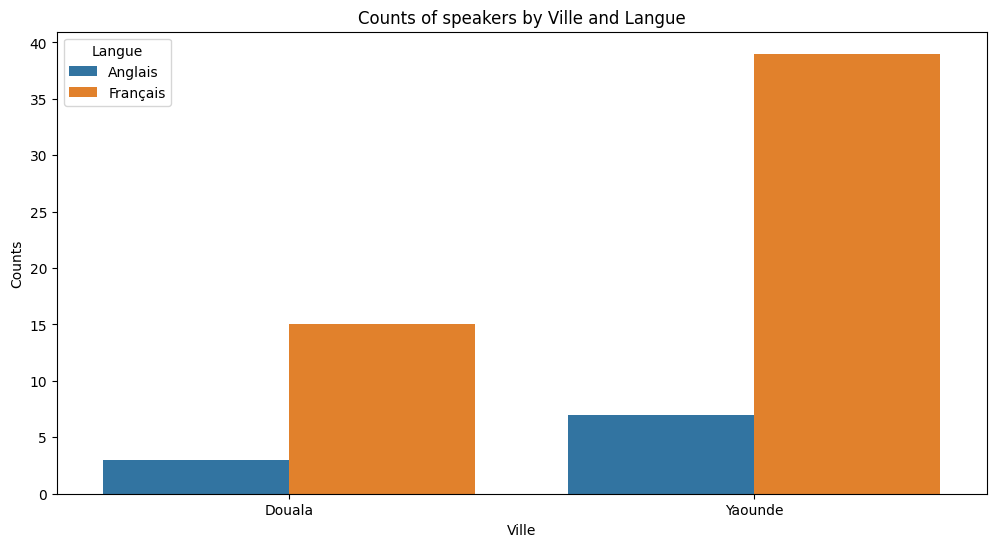

In [30]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Ville', y='Counts', hue='Langue', data=counts_by_ville_langue)
plt.title('Counts of speakers by Ville and Langue')
plt.show()

In [33]:
# Map 'oui' to True and 'non' to False
df['Participation_Concours_Bool'] = df['Participation_Concours'].map({'Oui': True, 'Non': False})

# Display the counts of True and False values
participation_counts = df['Participation_Concours_Bool'].value_counts()
print("Counts of Participation in Contests (True/False):")
print(participation_counts)

Counts of Participation in Contests (True/False):
Participation_Concours_Bool
False    45
True     19
Name: count, dtype: int64


In [34]:
# Display the counts of each category in the 'Categorie' column
categorie_counts = df['Information_Concours'].value_counts()

# Display the statistics
print("Statistics for the 'Categorie' column:")
print(categorie_counts)


Statistics for the 'Categorie' column:
Information_Concours
Whatsapp    32
Autres      21
Facebook     9
Name: count, dtype: int64
